In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [102]:
# pulling the data from the csv file 
df = pd.read_csv("zomatowithsensor_csv")
df

,Name,Aggregate Rating,Type,Price,Latitude,Longitude,Sensor ID,Sensor
0,Soul Cafe,3.0,"Coffee and Tea, Cafe Food",3,-37.813075,144.965281,1,Bourke Street Mall (North)
1,Song Tea,3.5,Bubble Tea,1,-37.813810,144.965600,1,Bourke Street Mall (North)
2,Sensory Lab - Bourke Street,3.4,"Coffee and Tea, Sandwich, Desserts",2,-37.813398,144.964499,1,Bourke Street Mall (North)
3,SamSam,4.0,Korean,3,-37.812885,144.965210,1,Bourke Street Mall (North)
4,Boost Juice,3.7,"Juices, Beverages",1,-37.813798,144.965849,1,Bourke Street Mall (North)
...,...,...,...,...,...,...,...,...
106,The Borek Bakehouse,4.4,"Bakery, Middle Eastern",1,-37.807711,144.960005,26,QV Market-Elizabeth St (West)
107,Chickcha,3.7,"Coffee and Tea, Cafe Food",2,-37.809073,144.961767,26,QV Market-Elizabeth St (West)
108,Damiao Panda Fan 大妙火锅 · 川菜,3.0,"Hot Pot, Sichuan, Chinese",3,-37.809614,144.961199,26,QV Market-Elizabeth St (West)
109,Mansae Korean BBQ & Bar,4.5,"Korean, Korean BBQ",4,-37.809563,144.959607,26,QV Market-Elizabeth St (West)


In [103]:
df.count()

Name                111
Aggregate Rating    111
Type                111
Price               111
Latitude            111
Longitude           111
Sensor ID           111
Sensor              111
dtype: int64

In [104]:
df.dtypes

Name                 object
Aggregate Rating    float64
Type                 object
Price                 int64
Latitude            float64
Longitude           float64
Sensor ID             int64
Sensor               object
dtype: object

In [105]:
# grouping by the date and applying aggregates
grouped = df.groupby(["Sensor"])
averages_df = grouped[['Aggregate Rating','Price']].mean()
averages_df.head()

,Aggregate Rating,Price
Sensor,,
Bourke Street Mall (North),3.037838,2.000000
Flinders St-Spark La,3.621622,2.594595
QV Market-Elizabeth St (West),3.767568,2.351351


In [106]:
averages_df["Yearly Average Ped Count"] = ""
averages_df

,Aggregate Rating,Price,Yearly Average Ped Count
Sensor,,,
Bourke Street Mall (North),3.037838,2.000000,
Flinders St-Spark La,3.621622,2.594595,
QV Market-Elizabeth St (West),3.767568,2.351351,


In [107]:
location_averages_df = pd.read_csv("censors2019_chosen3_dailyaverage.csv")
location_averages_df

,Bourke Street Mall (North),Flinders St-Spark La,QV Market-Elizabeth St (West)
0,1504.125000,185.708333,586.250000
1,1458.750000,154.833333,551.000000
2,1283.727273,138.818182,512.181818
3,1384.791667,180.416667,588.875000
4,1442.583333,101.375000,683.333333
...,...,...,...
357,1438.166667,138.791667,577.958333
358,1133.666667,133.625000,383.375000
359,1304.083333,146.083333,583.583333
360,1299.125000,105.333333,633.041667


In [108]:
each_average = location_averages_df.mean()
each_average

Bourke Street Mall (North)       1356.940859
Flinders St-Spark La              147.076348
QV Market-Elizabeth St (West)     607.616849
dtype: float64

In [109]:
averages_df["Yearly Average Ped Count"]=each_average
averages_df

,Aggregate Rating,Price,Yearly Average Ped Count
Sensor,,,
Bourke Street Mall (North),3.037838,2.000000,1356.940859
Flinders St-Spark La,3.621622,2.594595,147.076348
QV Market-Elizabeth St (West),3.767568,2.351351,607.616849


In [110]:
averages_df.reset_index(inplace=True)
averages_df

,Sensor,Aggregate Rating,Price,Yearly Average Ped Count
0,Bourke Street Mall (North),3.037838,2.000000,1356.940859
1,Flinders St-Spark La,3.621622,2.594595,147.076348
2,QV Market-Elizabeth St (West),3.767568,2.351351,607.616849


In [111]:
averages_df.to_csv("sensors3_averaged_rating_price_pedestrians.csv")

In [112]:
averages_df.dtypes

Sensor                       object
Aggregate Rating            float64
Price                       float64
Yearly Average Ped Count    float64
dtype: object

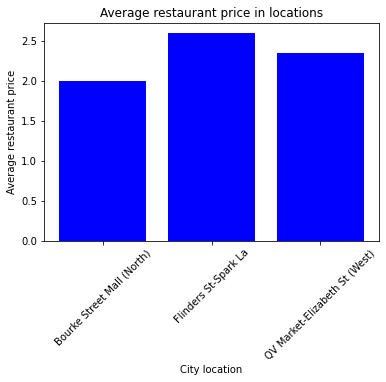

In [113]:
locations = averages_df["Sensor"]
price = averages_df["Price"]
# Create a bar chart based upon the above data
plt.bar(locations, price, color="b", align="center")

plt.title("Average restaurant price in locations")
plt.xlabel("City location")
plt.ylabel("Average restaurant price")
plt.xticks(locations, rotation=45)
# plt.figure(figsize=(10,10))
# plt.tight_layout()
plt.savefig("../Output/barchart_avpricein3locations.png")
plt.show()

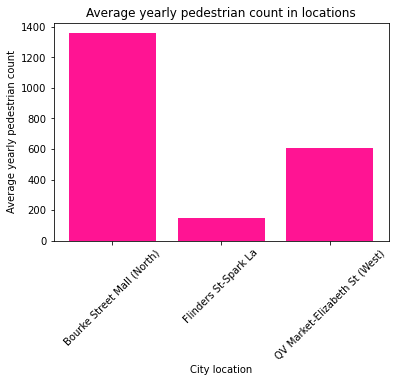

In [116]:
locations = averages_df["Sensor"]
footfall = averages_df["Yearly Average Ped Count"]
# Create a bar chart based upon the above data
plt.bar(locations, footfall, color="deeppink", align="center")
plt.title("Average yearly pedestrian count in locations")
plt.xlabel("City location")
plt.ylabel("Average yearly pedestrian count")
plt.xticks(locations, rotation=45)
# plt.figure(figsize=(10,10))
# plt.tight_layout()
plt.savefig("../Output/barchart_yearlyavpedcountin3locations.png")
plt.show()

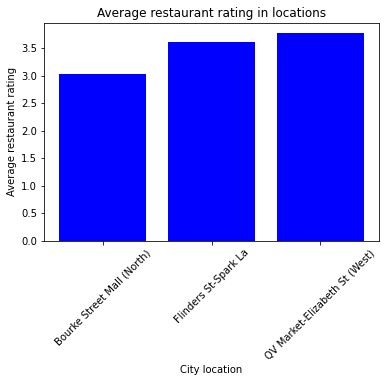

In [115]:
locations = averages_df["Sensor"]
rating = averages_df["Aggregate Rating"]
# Create a bar chart based upon the above data
plt.bar(locations, rating, color="b", align="center")
plt.title("Average restaurant rating in locations")
plt.xlabel("City location")
plt.ylabel("Average restaurant rating")
plt.xticks(locations, rotation=45)
# plt.figure(figsize=(10,10))
# plt.tight_layout()
plt.savefig("../Output/barchart_avratingin3locations.png")
plt.show()

In [83]:
ratingprice_df = averages_df.loc[:,["Sensor","Aggregate Rating", "Price"]]
ratingprice_df                            

,Sensor,Aggregate Rating,Price
0,Bourke Street Mall (North),3.037838,2.000000
1,Flinders St-Spark La,3.621622,2.594595
2,QV Market-Elizabeth St (West),3.767568,2.351351


In [94]:
ratingprice_df = ratingprice_df.set_index("Sensor")
ratingprice_df

,Aggregate Rating,Price
Sensor,,
Bourke Street Mall (North),3.037838,2.000000
Flinders St-Spark La,3.621622,2.594595
QV Market-Elizabeth St (West),3.767568,2.351351


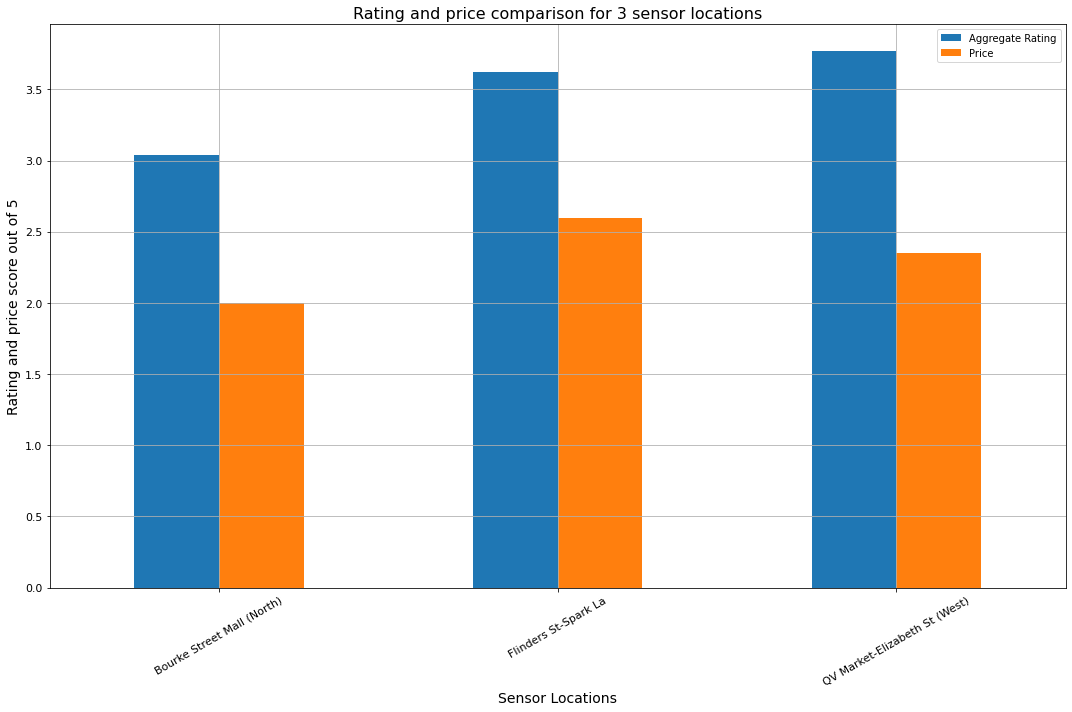

In [100]:
# Create a bar chart based off of the group series from before
count_chart = ratingprice_df.plot(kind='bar',rot=30,fontsize=11, figsize=(15,10), grid=True)
# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Sensor Locations", fontsize=14)
count_chart.set_ylabel("Rating and price score out of 5",fontsize=14)
count_chart.set_title("Rating and price comparison for 3 sensor locations", fontsize=16)
plt.tight_layout()
count_chart.get_figure()
count_chart.figure.savefig("../Output/bar_compareratingprice_3locations.png")
plt.show()

In [98]:
# BSM busiest, flinders quietest, qvm inbetween

SyntaxError: invalid syntax (<ipython-input-98-0af652926b27>, line 1)